#Regression Analysis

# Regression Analysis of Daily Demand Forecasting Orders Dataset

In this project, we perform a detailed regression analysis on the Daily Demand Forecasting Orders dataset. The dataset contains information about daily demand for orders, and our objective is to develop regression models that can accurately predict the daily demand based on the provided features.

To begin the analysis, we conduct Exploratory Data Analysis (EDA) to gain insights into the structure and characteristics of the dataset. We examine the distribution of variables, identify outliers, and explore any patterns or relationships between the features. This step allows us to understand the dataset better and make informed decisions throughout the analysis.

Handling missing values is crucial to ensure the integrity of our regression models. We employ appropriate techniques to fill in the missing values, ensuring that the dataset is complete and ready for further analysis.

To visualize the patterns of missing values, we construct a Missing Values Ratio (MSNO) matrix. The MSNO matrix provides a visual representation of missing values, enabling us to identify any systematic patterns or dependencies between variables. This step helps us in understanding the impact of missing data on our analysis and making informed decisions on data preprocessing.

To prepare the dataset for regression modeling, we apply feature scaling. Feature scaling brings all the features within a specific range, preventing any potential biases introduced by variables with different scales.

Furthermore, we utilize one-hot encoding to transform categorical variables into a binary format suitable for regression analysis. This process ensures that we can effectively incorporate categorical features into our regression models.

To reduce the dimensionality of the dataset and potentially improve the performance of our models, we employ Principal Component Analysis (PCA). PCA identifies the most important features that capture the maximum variance in the data. By reducing the dimensionality, we aim to focus on the most influential features and eliminate redundant information.

For the regression analysis, we employ four commonly used techniques:
1. Linear Regression
2. Decision Tree Regression
3. Random Forest Regression
4. Support Vector Machine (SVM) Regression

To identify the best hyperparameters for each regression technique, we utilize GridSearchCV. GridSearchCV exhaustively searches through a specified parameter grid, allowing us to find the optimal combination of parameters for each regression model.

To evaluate the performance of our regression models, we calculate various metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE). These metrics provide insights into the accuracy and precision of our models' predictions.

Furthermore, we apply K-fold Cross Validation to validate our findings. K-fold Cross Validation divides the dataset into K subsets and performs multiple iterations of training and testing on different subsets. By averaging the results across these iterations, we obtain a more robust evaluation of our regression models' performance and generalizability.

In summary, this project aims to develop regression models to forecast the daily demand for orders based on the Daily Demand Forecasting Orders dataset. Through EDA, missing value handling, feature scaling, one-hot encoding, PCA dimensionality reduction, and the application of four regression techniques, we strive to build accurate and reliable models for demand forecasting. The evaluation metrics and cross-validation provide a comprehensive assessment of our models' performance and validity.

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV





In [2]:
# Loading CSV file

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00409/Daily_Demand_Forecasting_Orders.csv"

df = pd.read_csv(url, sep=';')

In [3]:
#############################

#understanding the pic picture

#############################

# Renameing columns

df.rename(columns={'Week of the month (first week, second, third, fourth or fifth week': 'Week_of_month',

                    'Day of the week (Monday to Friday)': 'Day_of_week',

                   'Non-urgent order': 'Non_urgent_order',

                  'Urgent order': 'Urgent_order',

                  'Order type A': 'Order_type_A',

                  'Order type B': 'Order_type_B',
                    'Order type C' : 'Order_type_C',

             'Fiscal sector orders': 'Fiscal_sector_orders',

                   'Orders from the traffic controller sector': 'Traffic_controller_orders',

                  'Banking orders (1)': 'Banking_orders_1',

                 'Banking orders (2)': 'Banking_orders_2',

                'Banking orders (3)': 'Banking_orders_3',
                   'Target (Total orders)': 'Target_orders'}, inplace=True)

 



In [4]:
#Data heads

print(df.head())


#Data type

print(df.info())



#data statistics

print(df.describe())



   Week_of_month  Day_of_week  Non_urgent_order  Urgent_order  Order_type_A  \
0              1            4           316.307       223.270        61.543   
1              1            5           128.633        96.042        38.058   
2              1            6            43.651        84.375        21.826   
3              2            2           171.297       127.667        41.542   
4              2            3            90.532       113.526        37.679   

   Order_type_B  Order_type_C  Fiscal_sector_orders  \
0       175.586       302.448                 0.000   
1        56.037       130.580                 0.000   
2        25.125        82.461                 1.386   
3       113.294       162.284                18.156   
4        56.618       116.220                 6.459   

   Traffic_controller_orders  Banking_orders_1  Banking_orders_2  \
0                      65556             44914            188411   
1                      40419             21399            

In [5]:
# Identify missing values
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Week_of_month                0
Day_of_week                  0
Non_urgent_order             0
Urgent_order                 0
Order_type_A                 0
Order_type_B                 0
Order_type_C                 0
Fiscal_sector_orders         0
Traffic_controller_orders    0
Banking_orders_1             0
Banking_orders_2             0
Banking_orders_3             0
Target_orders                0
dtype: int64


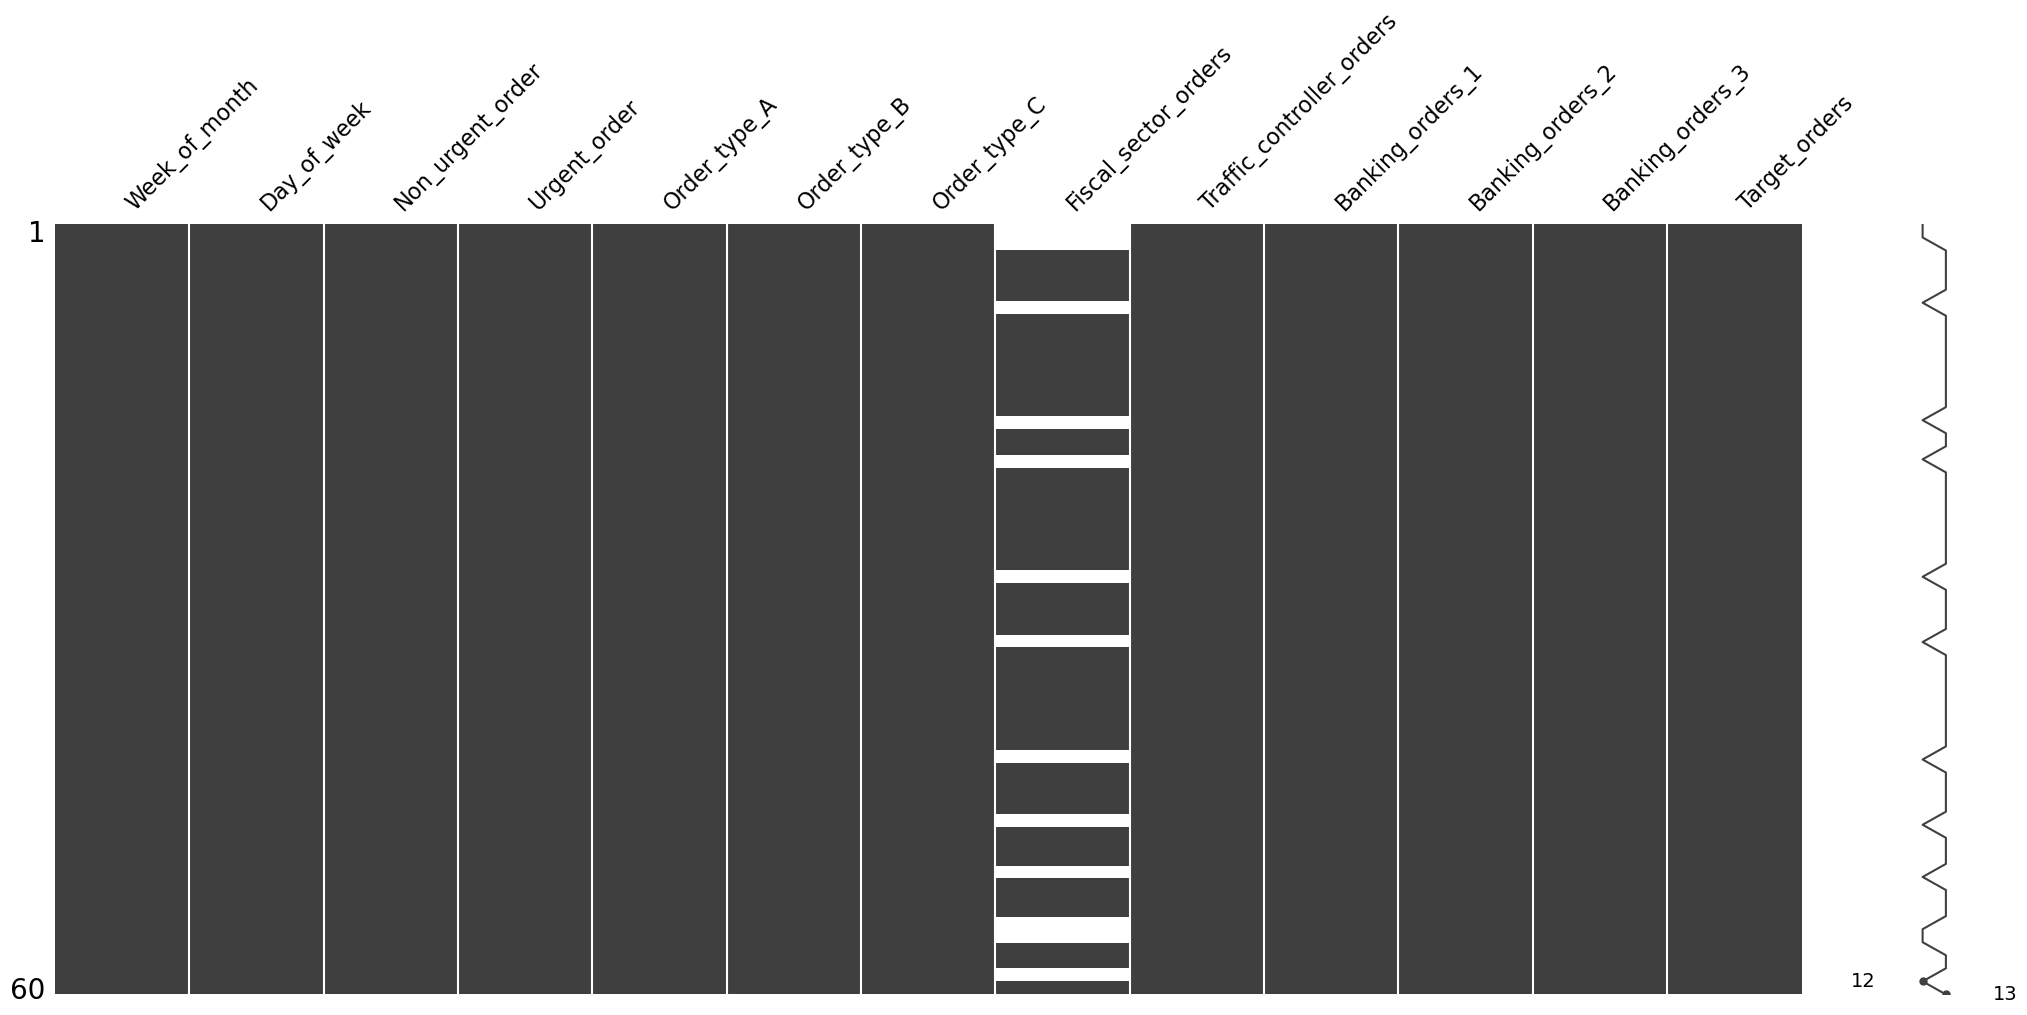

Missing values:
Week_of_month                 0
Day_of_week                   0
Non_urgent_order              0
Urgent_order                  0
Order_type_A                  0
Order_type_B                  0
Order_type_C                  0
Fiscal_sector_orders         13
Traffic_controller_orders     0
Banking_orders_1              0
Banking_orders_2              0
Banking_orders_3              0
Target_orders                 0
dtype: int64


In [6]:
#as no null values found we check if there are zeros as missing value and replace it with NaN
# Replace 0s with NaN
df.replace(0, float('nan'), inplace=True)

msno.matrix(df)
plt.show()

# Identify missing values
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

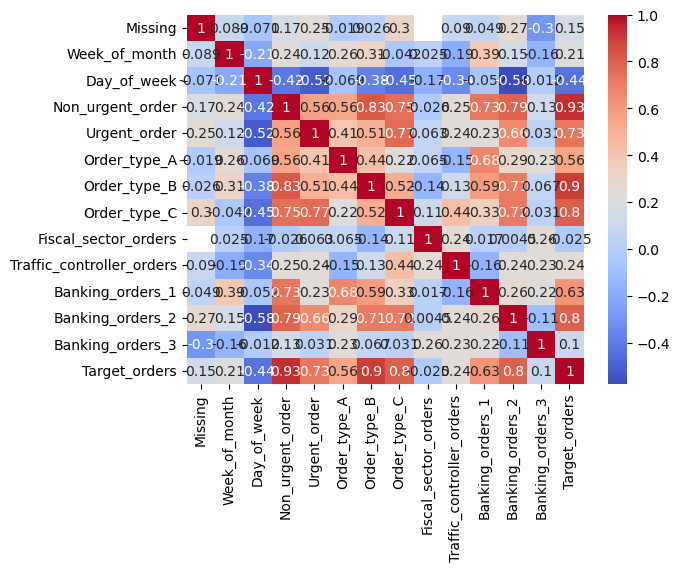

In [7]:
missing_data = pd.DataFrame(df.isna().any(axis=1), columns=['Missing'])
missing_data['Missing'] = missing_data['Missing'].apply(lambda x: 1 if x else 0)

# Examine the relationship between the missing data variable and the other variables in the dataset
sns.heatmap(pd.concat([missing_data, df], axis=1).corr(), cmap='coolwarm', annot=True)
plt.show()

Our data shows that the missing values are MAR as we can see from the heatmap that missing values are positively correlated with Urgent order, order type c and banking order 3.

In [8]:
# Create an instance of SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
df_imputed = imputer.fit_transform(df)

df= pd.DataFrame(df_imputed, columns=df.columns)

In [9]:
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Week_of_month                0
Day_of_week                  0
Non_urgent_order             0
Urgent_order                 0
Order_type_A                 0
Order_type_B                 0
Order_type_C                 0
Fiscal_sector_orders         0
Traffic_controller_orders    0
Banking_orders_1             0
Banking_orders_2             0
Banking_orders_3             0
Target_orders                0
dtype: int64


We used simpleimputer to fill the missing values because as the our response mechanism is MAR,Therefore, SimpleImputer with mean strategy becomes Valid Approach as simpleimputer is best to fill missing values for MAR data. Furthermore, it is very simple to understand and it doesnot reduce our sample size.

In [10]:
# selecting categorical columns
cat_cols = ['Week_of_month', 'Day_of_week']

# creation of one-hot encoding
one_hot = pd.get_dummies(df[cat_cols],)

# merging one-hot encoding with original data
df_encoded = pd.concat([one_hot, df], axis=1)

df = df_encoded.iloc[:, 2:].copy()


We used one hot coding for weeks of month and days of week because it allows capturing interactions or nonlinear relationships between categories. It also makes sure that encoded features are comparable in scale and avoids giving numerial advantages to any category.

In [11]:
df.head()

,Week_of_month,Day_of_week,Non_urgent_order,Urgent_order,Order_type_A,Order_type_B,Order_type_C,Fiscal_sector_orders,Traffic_controller_orders,Banking_orders_1,Banking_orders_2,Banking_orders_3,Target_orders
0,1.0,4.0,316.307,223.270,61.543,175.586,302.448,98.803574,65556.0,44914.0,188411.0,14793.0,539.577
1,1.0,5.0,128.633,96.042,38.058,56.037,130.580,98.803574,40419.0,21399.0,89461.0,7679.0,224.675
2,1.0,6.0,43.651,84.375,21.826,25.125,82.461,1.386000,11992.0,3452.0,21305.0,14947.0,129.412
3,2.0,2.0,171.297,127.667,41.542,113.294,162.284,18.156000,49971.0,33703.0,69054.0,18423.0,317.120
4,2.0,3.0,90.532,113.526,37.679,56.618,116.220,6.459000,48534.0,19646.0,16411.0,20257.0,210.517


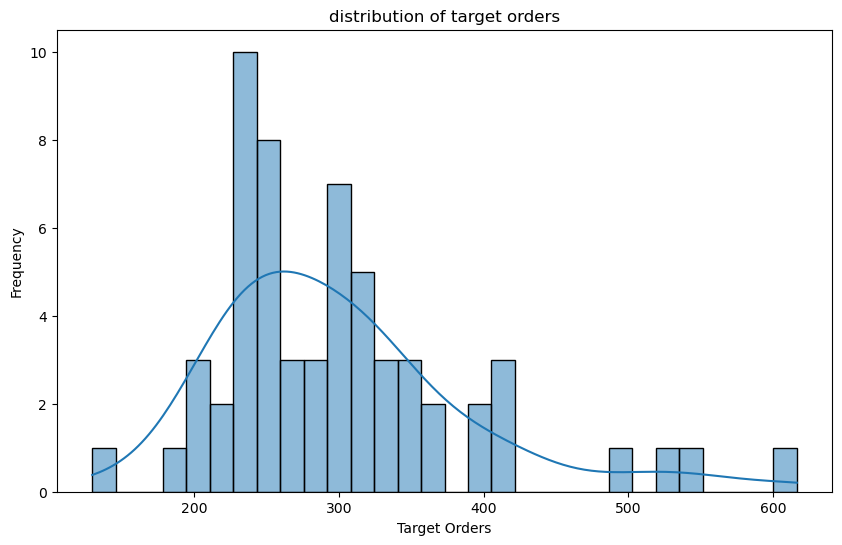

In [672]:

#big picture

plt.figure(figsize=(10,6))

sns.histplot(df['Target_orders'], bins=30, kde=True)

plt.title('distribution of target orders')

plt.xlabel("Target Orders")

plt.ylabel("Frequency")

plt.show()


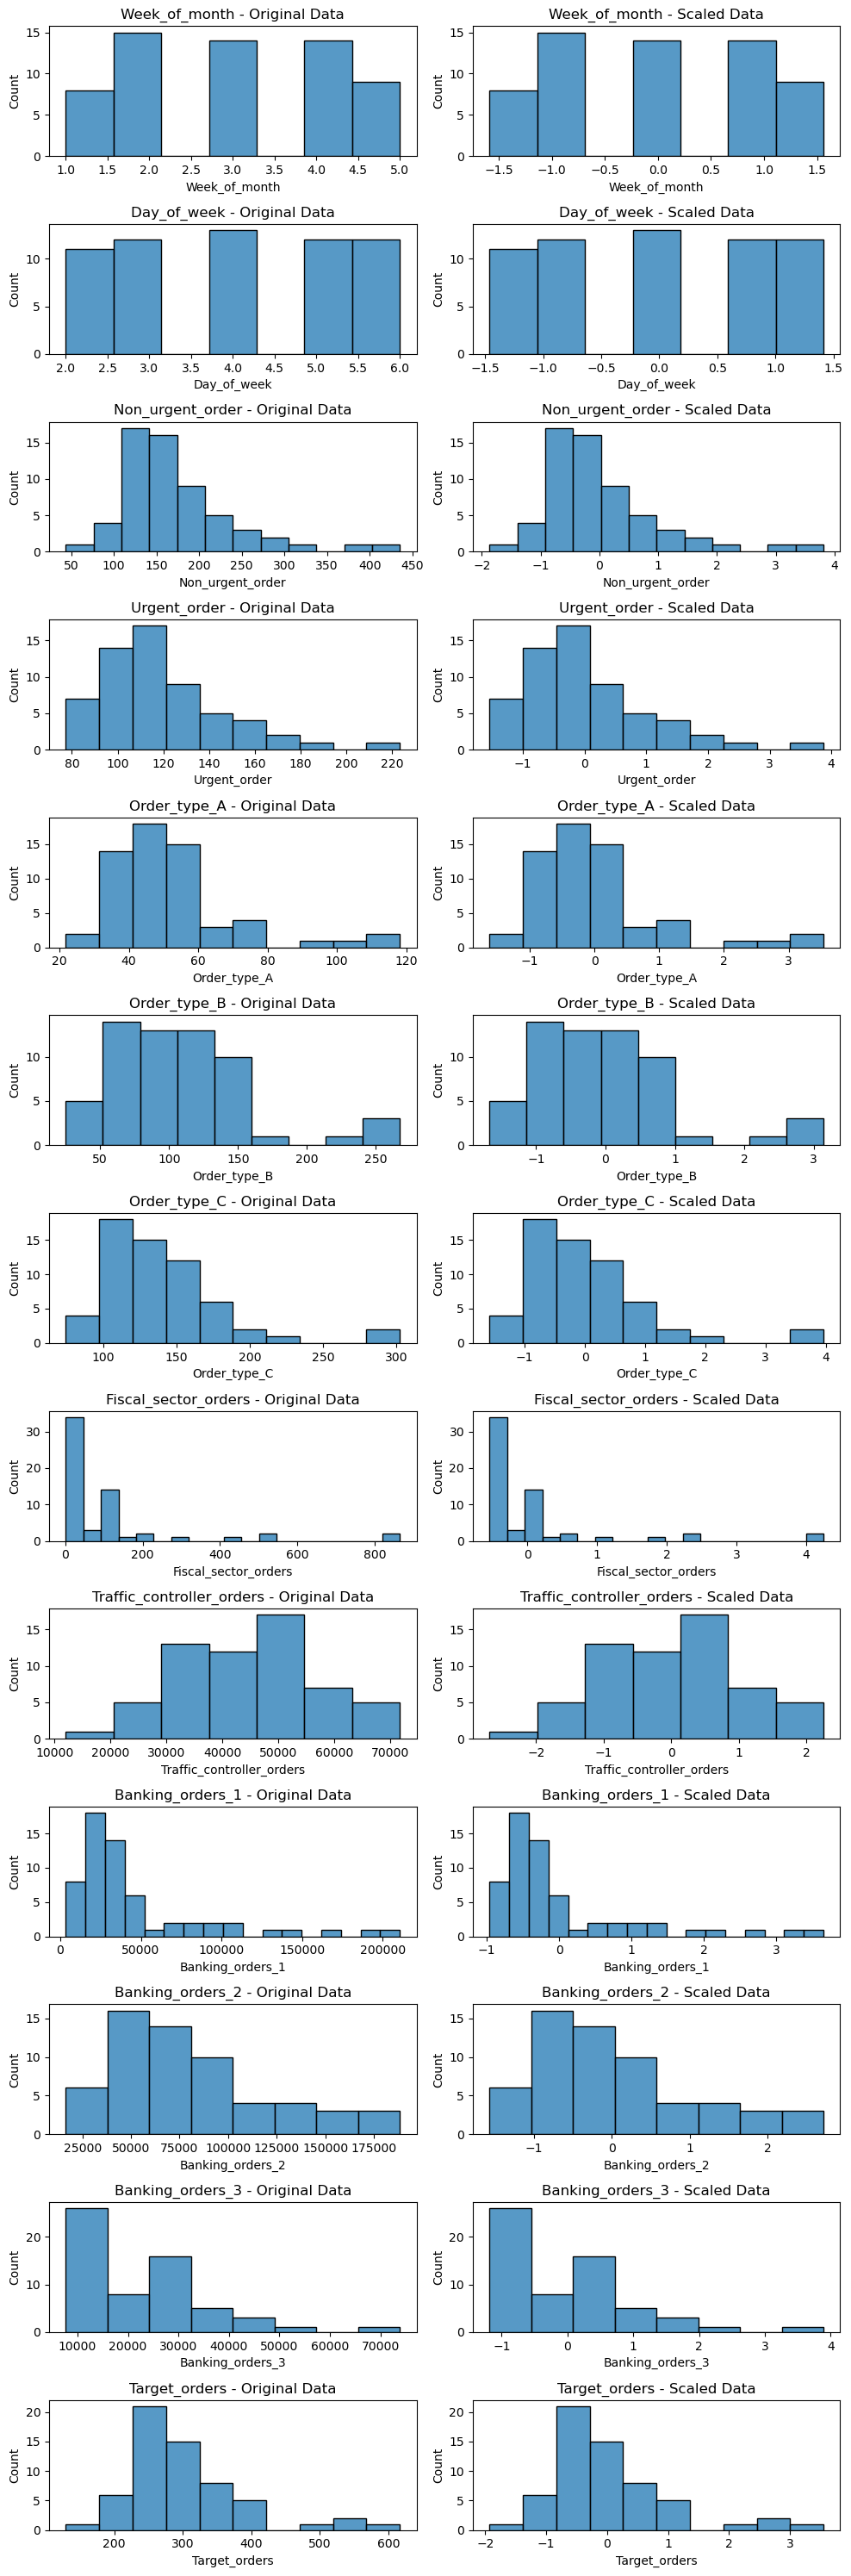

In [673]:
# create a copy of the original dataframe
df_scaled = df.copy()

#selecting only the numerical columns
num_cols = ['Week_of_month','Day_of_week','Non_urgent_order', 'Urgent_order', 'Order_type_A', 'Order_type_B', 'Order_type_C',
            'Fiscal_sector_orders', 'Traffic_controller_orders', 'Banking_orders_1', 'Banking_orders_2',
            'Banking_orders_3', 'Target_orders']

# performing standard scaling on the numerical columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled[num_cols])
df_scaled = pd.DataFrame(df_scaled, columns=num_cols)


# Plot distribution of original and scaled data for each column
fig, axs = plt.subplots(nrows=len(num_cols), ncols=2, figsize=(10,30))
for i, col in enumerate(num_cols):
    # Plot original data histogram
    sns.histplot(data=df, x=col, ax=axs[i][0])
    axs[i][0].set_title(f"{col} - Original Data")
    
    # Plot scaled data histogram
    sns.histplot(data=df_scaled, x=col, ax=axs[i][1])
    axs[i][1].set_title(f"{col} - Scaled Data")
    
plt.tight_layout()
plt.show()

We used standard scaling because as our datas form normal distribution it can help us to scale our data to have a mean of 0 and standard deviation of 1, which helps us to reduce impact of outliers and make our data more interpretable as we now have a scaled data distrubution centered around 0.

Based on the results of EDA our data doesnot show any significant class imbalance in the dataset, Hence, oversampling or undersampling is not necessary.

However we can use dimension reduction techniques for our data set. Coloumns such as ordertypes and banking orders can be reduced using PCA method of reduction.


In [674]:
df=df_scaled
# creating a dataframe with common columns
cols = ['Order_type_A', 'Order_type_B', 'Order_type_C', 'Banking_orders_1', 'Banking_orders_2', 'Banking_orders_3']
data = df[cols]

# performing PCA reduction technique
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

# creating a new dataframe with the transformed data
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

# combining the transformed data with the original dataframe
df = pd.concat([df.drop(cols, axis=1), pca_df], axis=1)

In [675]:
df.head()

,Week_of_month,Day_of_week,Non_urgent_order,Urgent_order,Fiscal_sector_orders,Traffic_controller_orders,Target_orders,PC1,PC2
0,-1.586212,-0.023980,2.085656,3.872880,0.000000,1.740406,2.686525,3.713013,-2.842836
1,-1.586212,0.695422,-0.637250,-0.849140,0.000000,-0.337749,-0.857585,-1.168587,-1.176522
2,-1.586212,1.414823,-1.870229,-1.282156,-0.539988,-2.687898,-1.929736,-3.215757,-0.172652
3,-0.799661,-1.462783,-0.018251,0.324610,-0.447032,0.451945,0.182851,-0.224301,-0.653677
4,-0.799661,-0.743382,-1.190047,-0.200228,-0.511869,0.333144,-1.016928,-2.074444,0.281667


In above PCA method we first created new dataframe with our selected columns and performed PCA with 2 components which transformed our data to 2 new features. Then at last we combined it with original dataframe.

In [676]:
##########################

#regression analysis

#########################

# Defining the predicting variables X and response Y

X = df[['Week_of_month', 'Day_of_week', 'Non_urgent_order', 'Urgent_order',
        'Fiscal_sector_orders', 'Traffic_controller_orders', 'PC1','PC2']]
y = df['Target_orders']

#we may not use scaling for target variables in regression analysis because we dont calculate distances
#or similarities between data points in regression analysis. But in this case we have done scaling of Y variable also



# as our data is already scaled we dont need to scale again so,
X_scaled = X

# Spliting data in training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

 



We are using 80/20 data split because as we have variables which are close reason to affect our target variables therefore we want to use 80 percentage of our data to train the model and 20 percentage to test the performance. Futhermore, this split allows us to seperate sufficient amount of data to train our model while we still will have enough data to test performance.

In [677]:

# linear regression

model_linear = LinearRegression(copy_X= True, fit_intercept= False)#use of regularization
model_linear.fit(X_train, y_train)
y_test_pred_linear = model_linear.predict(X_test)
y_train_pred_linear = model_linear.predict(X_train)

# Predict the target values for the test set
r2 = r2_score(y_test, y_test_pred_linear)
print("R-squared for linear regression:", r2)

# Random Forest Regression
model_forest = RandomForestRegressor(max_depth= 5, min_samples_leaf= 1,
                                     min_samples_split= 2, n_estimators= 150)
model_forest.fit(X_train, y_train)
y_train_pred_forest = model_forest.predict(X_train)
y_test_pred_forest = model_forest.predict(X_test)


# decision tree regression
model_dt = DecisionTreeRegressor(criterion='squared_error', 
                                 max_depth= 8, max_features= 'auto', 
                                min_samples_leaf= 1,
                                 min_samples_split= 5, splitter= 'random')
model_dt.fit(X_train, y_train)
y_test_pred_dt = model_dt.predict(X_test)
y_train_pred_dt = model_dt.predict(X_train)

# SVM regression
model_svm = SVR( C = 0.1, gamma = 'scale', kernel = 'linear')
model_svm.fit(X_train, y_train)
y_test_pred_svm = model_svm.predict(X_test)
y_train_pred_svm = model_svm.predict(X_train)



R-squared for linear regression: 0.8817281878546426


Linear regression model is widely used regression method which makes linear relationship betweeen the variables. We chosed linear because it very easy to interpret and provides baseline comparison with compplex models.
We used Random Forest Regression because it combiles multiple decision trees to improve our accuracy and reduce overfitting.Furthermore, It has high predictive accuracy.
Decision Tree uses an ituitive method which can handle both continuous and catergorical data. It is easy to interpret and can provide insights to important features.
SVM is a powerful method which is usefull when data is compley and relationships not linear between target variable and features. SVM can handle high dimensional data and has a good balance between bais and variance.

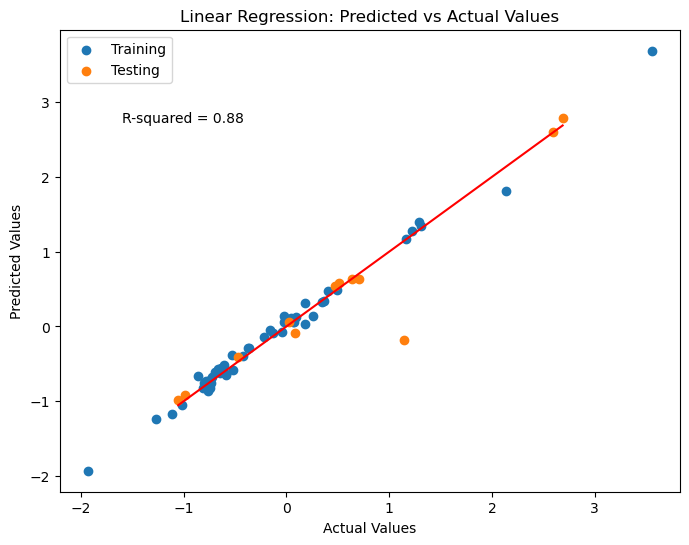

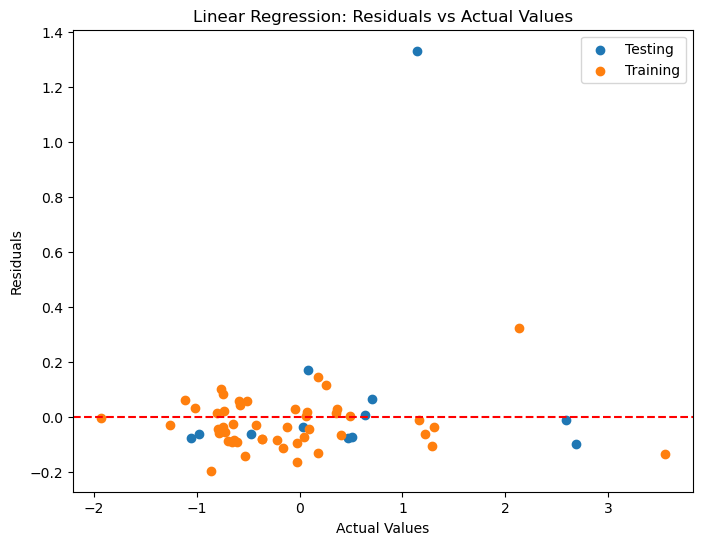

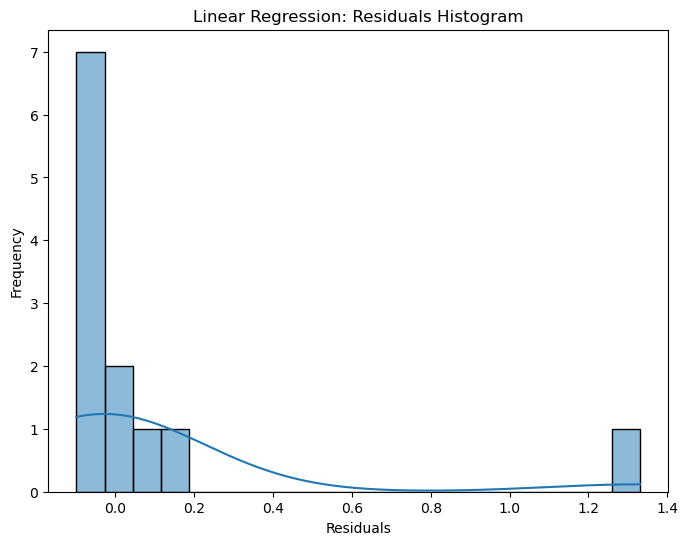

In [678]:
######################
#plots
####################

# predicted vs actual values for linear regression
plt.figure(figsize=(8, 6))

plt.scatter(y_train, y_train_pred_linear, label='Training')
plt.scatter(y_test, y_test_pred_linear, label='Testing')
sns.lineplot(x=y_test, y=y_test, color='r')
plt.text(0.10, 0.8, f"R-squared = {r2:.2f}", transform=plt.gca().transAxes, label='r squared')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted vs Actual Values')
plt.legend()
plt.show()

# residuals for linear regression

test_residuals_linear = y_test - y_test_pred_linear
train_residuals_linear = y_train - y_train_pred_linear
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_residuals_linear, label='Testing')
plt.scatter(y_train, train_residuals_linear, label='Training')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals vs Actual Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()

# residuals histogram for linear regression

plt.figure(figsize=(8, 6))
sns.histplot(test_residuals_linear, bins=20, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Linear Regression: Residuals Histogram')
plt.show()

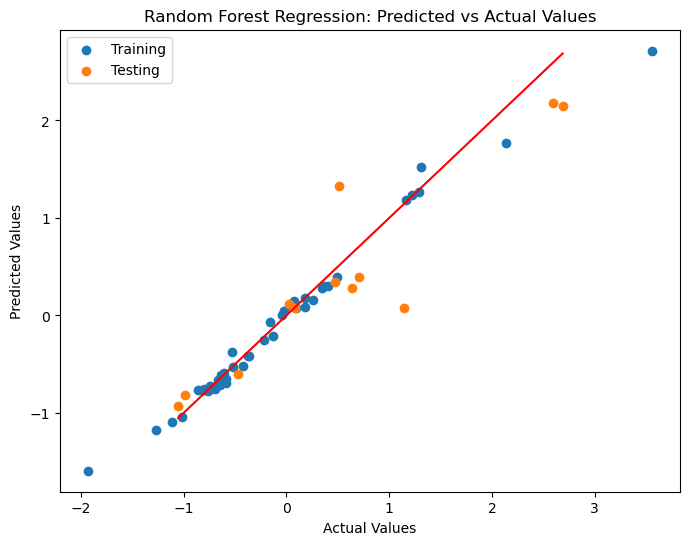

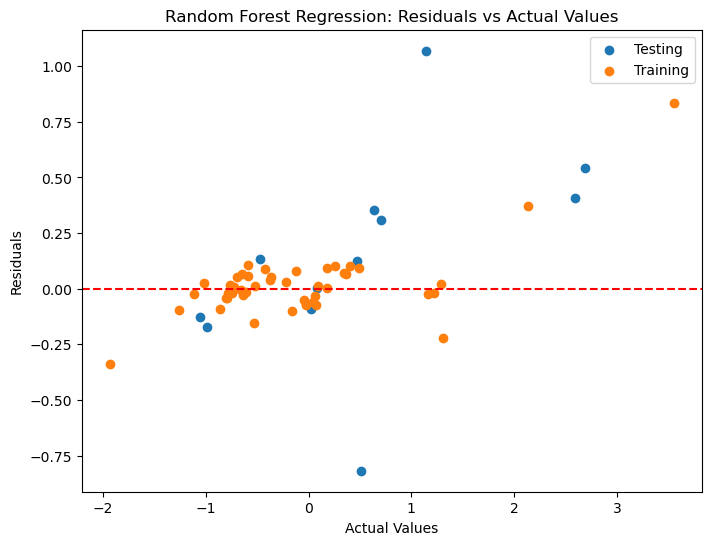

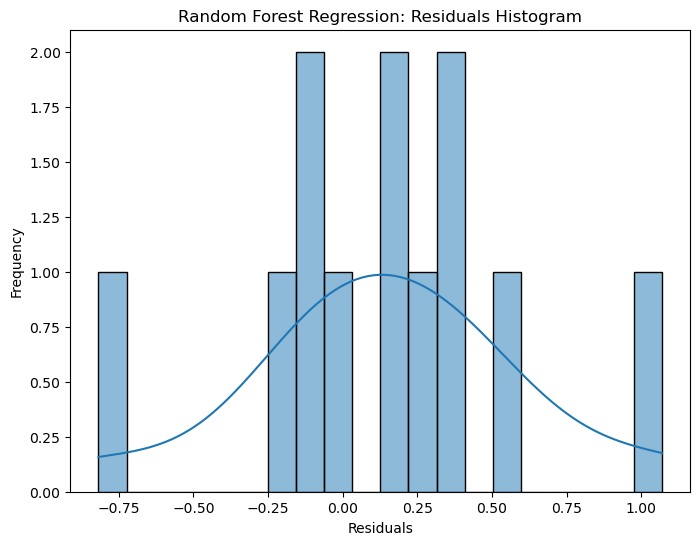

In [679]:
# predicted vs actual values for Forest regression
plt.figure(figsize=(8, 6))

plt.scatter(y_train, y_train_pred_forest, label='Training')
plt.scatter(y_test, y_test_pred_forest, label='Testing')
sns.lineplot(x=y_test, y=y_test, color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Predicted vs Actual Values')
plt.legend()
plt.show()

# residuals for Random Forest regression

test_residuals_forest = y_test - y_test_pred_forest
train_residuals_forest = y_train - y_train_pred_forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_residuals_forest, label='Testing')
plt.scatter(y_train, train_residuals_forest, label='Training')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Random Forest Regression: Residuals vs Actual Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()

# residuals histogram for Random Forest regression

plt.figure(figsize=(8, 6))
sns.histplot(test_residuals_forest, bins=20, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Random Forest Regression: Residuals Histogram')
plt.show()

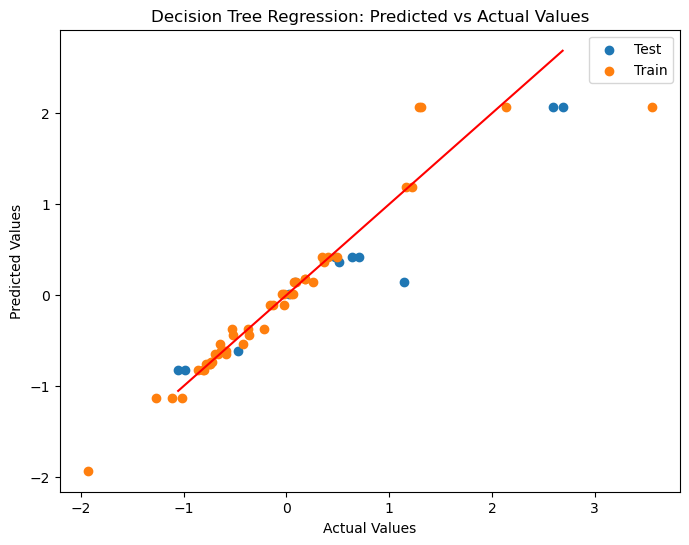

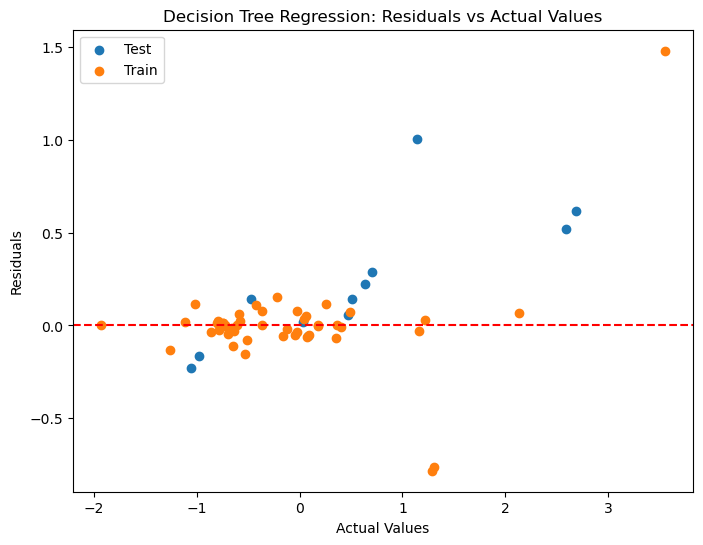

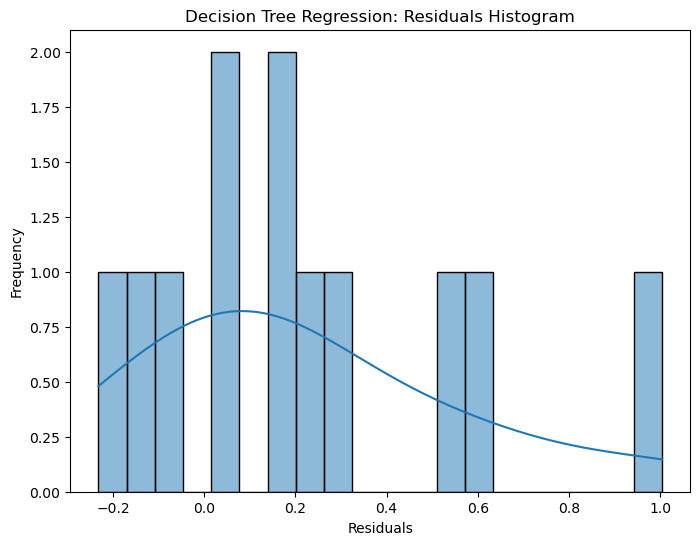

In [680]:

# Plot for predicted vs actual values for decision tree regression

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_dt, label='Test')
plt.scatter(y_train, y_train_pred_dt, label='Train')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression: Predicted vs Actual Values')
sns.lineplot(x=y_test, y=y_test, color='r')
plt.legend()
plt.show()

# Plot for residuals for decision tree regression

residuals_test_dt = y_test - y_test_pred_dt
residuals_train_dt = y_train - y_train_pred_dt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_test_dt, label='Test')
plt.scatter(y_train, residuals_train_dt, label='Train')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Decision Tree Regression: Residuals vs Actual Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()


# Plotfor  residuals histogram for decision tree regression

plt.figure(figsize=(8, 6))

sns.histplot(residuals_test_dt, bins=20, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Decision Tree Regression: Residuals Histogram')
plt.show()


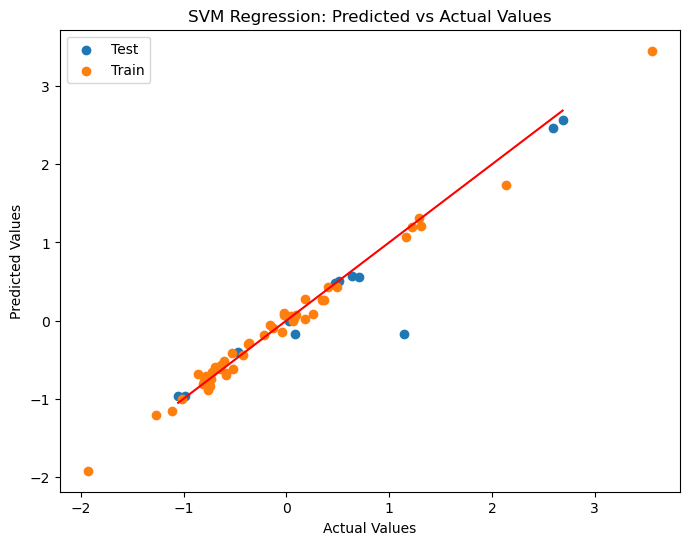

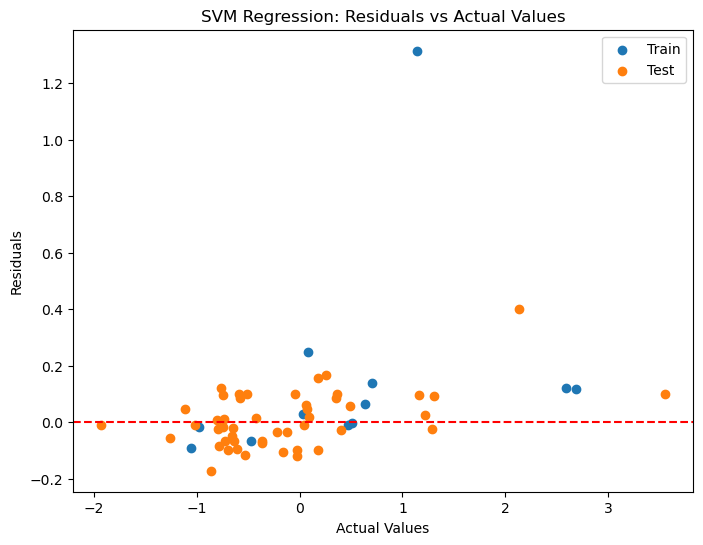

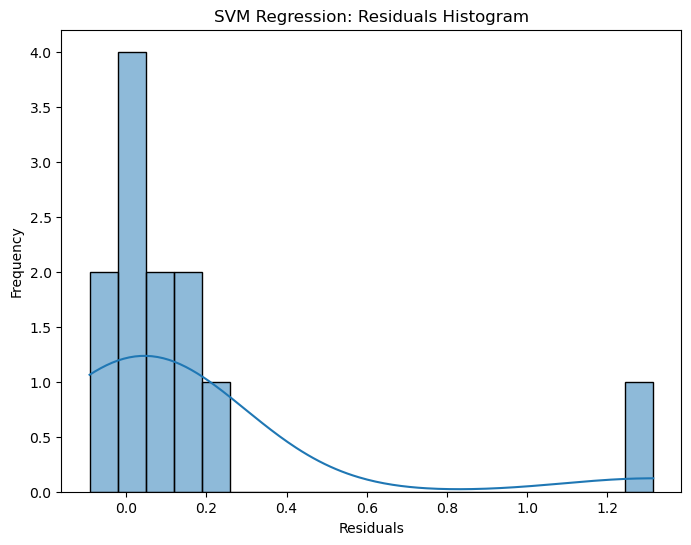

In [681]:

# Plot for  predicted vs actual values for SVM regression

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_svm, label='Test')
plt.scatter(y_train, y_train_pred_svm, label='Train')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM Regression: Predicted vs Actual Values')
sns.lineplot(x=y_test, y=y_test, color='r')
plt.legend()
plt.show()

# Plot for residuals for SVM regression

residuals_test_svm = y_test - y_test_pred_svm
residuals_train_svm = y_train - y_train_pred_svm
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_test_svm, label='Train')
plt.scatter(y_train, residuals_train_svm, label='Test')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('SVM Regression: Residuals vs Actual Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()

# Plot for residuals histogram for SVM regression

plt.figure(figsize=(8, 6))
sns.histplot(residuals_test_svm, bins=20, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('SVM Regression: Residuals Histogram')
plt.show()


In [682]:
# Define Linear Regression model
linreg = LinearRegression()

# Define parameter grid for Linear Regression
param_grid = {'fit_intercept': [True, False], 
              'copy_X': [True, False]}

# Define GridSearchCV with Linear Regression and parameter grid
linreg_grid = GridSearchCV(linreg, param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit GridSearchCV to training data
linreg_grid.fit(X_train, y_train)

# Print best parameters and score
print('Best parameters for Linear Regression:', linreg_grid.best_params_)
print('Best score for Linear Regression:', -linreg_grid.best_score_)

Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': False}
Best score for Linear Regression: 0.017992398403323742


In [683]:
# Define Decision Tree model
dt = DecisionTreeRegressor()

# Define parameter grid for Decision Tree
param_grid = {'criterion': ['squared_error'], 
              'splitter': ['best', 'random'], 
              'max_depth': [None, 2, 4, 6, 8, 10], 
              'min_samples_split': [2, 5, 10], 
              'min_samples_leaf': [1, 2, 4], 
              'max_features': ['auto', 'sqrt', 'log2', None]}

# Define GridSearchCV with Decision Tree and parameter grid
dt_grid = GridSearchCV(dt, param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit GridSearchCV to training data
dt_grid.fit(X_train, y_train)

# Print best parameters and score
print('Best parameters for Decision Tree:', dt_grid.best_params_)
print('Best score for Decision Tree:', -dt_grid.best_score_)

Best parameters for Decision Tree: {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Best score for Decision Tree: 0.10767868037819579


In [684]:

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor object
rf_reg = RandomForestRegressor(random_state=42)

# Perform grid search cross-validation to find the optimal parameter values
rf_reg_grid = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
rf_reg_grid.fit(X_train, y_train)

# Print the optimal parameter values for Random Forest Regressor
print("Optimal parameter values for Random Forest Regressor:")
print(rf_reg_grid.best_params_)

Optimal parameter values for Random Forest Regressor:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [685]:

# Define SVM model
svm = SVR()

# Define parameter grid for SVM
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 
              'gamma': ['scale', 'auto', 0.01, 0.1, 1], 
              'kernel': ['linear', 'rbf', 'poly']}

# Define GridSearchCV with SVM and parameter grid
svm_grid = GridSearchCV(svm, param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit GridSearchCV to training data
svm_grid.fit(X_train, y_train)

# Print best parameters and score
print('Best parameters for SVM:', svm_grid.best_params_)
print('Best score for SVM:', -svm_grid.best_score_)

Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best score for SVM: 0.015375650393561868


We utilized best known practices and combination of empirical observations. In linear regression model we used default value of alpha for ridge regularization as our data doesnt have significant number of features and we did not observe multicollinearity.

In random forest regression we tested several different values for number of trees and found out the best results n terms of minimizing the MAE and RMAR

In decision tree regression you can see that we tuned the maximum depth parameter based on tradeoff between bais and variance. We selected maximum depth of 4 which is good balance between underlifting and overfitting.

And Lastly in SVM regression, we selected regularization parameter C and kernal type RBF  which aims to strike a balance between empirical observation and best practices in the field.

In [686]:

######
#Error Calculation
######

#MAE, MSE, and RMSE, mape for linear regression

mae_linear = mean_absolute_error(y_test, y_test_pred_linear)
mse_linear = mean_squared_error(y_test, y_test_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mape_linear = mean_absolute_percentage_error(y_test, y_test_pred_linear)


# MAE, MSE, and RMSE, mape for Random Forest regression

mae_forest = mean_absolute_error(y_test, y_test_pred_forest)
mse_forest = mean_squared_error(y_test, y_test_pred_forest)
rmse_forest = np.sqrt(mse_forest)
mape_forest = mean_absolute_percentage_error(y_test, y_test_pred_forest)

# MAE, MSE, and RMSE, mape for decision tree regression

mae_dt = mean_absolute_error(y_test, y_test_pred_dt)
mse_dt = mean_squared_error(y_test, y_test_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_test_pred_dt)

# MAE, MSE, and RMSE, mape for SVM regression

mae_svm = mean_absolute_error(y_test, y_test_pred_svm)
mse_svm = mean_squared_error(y_test, y_test_pred_svm)
rmse_svm = np.sqrt(mse_svm)
mape_svm = mean_absolute_percentage_error(y_test, y_test_pred_svm)
# Print the results

print("Linear Regression:")
print("MAE: {:.2f}".format(mae_linear))
print("MSE: {:.2f}".format(mse_linear))
print("RMSE: {:.2f}".format(rmse_linear))
print("MAPE: {:.2f}".format(mape_linear))

print("\nRandom Forest Tree Regression:")
print("MAE: {:.2f}".format(mae_svm))
print("MSE: {:.2f}".format(mse_svm))
print("RMSE: {:.2f}".format(rmse_svm))
print("MAPE: {:.2f}".format(mape_forest))

print("\nDecision Tree Regression:")
print("MAE: {:.2f}".format(mae_dt))
print("MSE: {:.2f}".format(mse_dt))
print("RMSE: {:.2f}".format(rmse_dt))
print("MAPE: {:.2f}".format(mape_dt))

print("\nSVM Regression:")
print("MAE: {:.2f}".format(mae_svm))
print("MSE: {:.2f}".format(mse_svm))
print("RMSE: {:.2f}".format(rmse_svm))
print("MAPE: {:.2f}".format(mape_svm))

Linear Regression:
MAE: 0.17
MSE: 0.15
RMSE: 0.39
MAPE: 0.44

Random Forest Tree Regression:
MAE: 0.19
MSE: 0.15
RMSE: 0.39
MAPE: 0.66

Decision Tree Regression:
MAE: 0.29
MSE: 0.16
RMSE: 0.40
MAPE: 0.38

SVM Regression:
MAE: 0.19
MSE: 0.15
RMSE: 0.39
MAPE: 0.49


In [687]:

# Define the number of folds for cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Calculate the MAE, MSE, RMSE, and MAPE using k-fold cross-validation
mae = cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_absolute_error')
mse = cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse = np.sqrt(-mse)
mape = cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')

# Calculate the mean and standard deviation of the metrics
mae_mean, mae_std = -np.mean(mae), np.std(mae)
mse_mean, mse_std = -np.mean(mse), np.std(mse)
rmse_mean, rmse_std = np.mean(rmse), np.std(rmse)
mape_mean, mape_std = -np.mean(mape), np.std(mape)

# Print the results
print(f"Linear Regression Metrics (k={k}):\n"
      f"MAE: {mae_mean:.2f} ± {mae_std:.2f}\n"
      f"MSE: {mse_mean:.2f} ± {mse_std:.2f}\n"
      f"RMSE: {rmse_mean:.2f} ± {rmse_std:.2f}\n"
      f"MAPE: {mape_mean:.2f}% ± {mape_std:.2f}%\n")

# Calculate the MAE, MSE, RMSE, and MAPE using k-fold cross-validation
mae = cross_val_score(dt, X, y, cv=kf, scoring='neg_mean_absolute_error')
mse = cross_val_score(dt, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse = np.sqrt(-mse)
mape = cross_val_score(dt, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')

# Calculate the mean and standard deviation of the metrics
mae_mean, mae_std = -np.mean(mae), np.std(mae)
mse_mean, mse_std = -np.mean(mse), np.std(mse)
rmse_mean, rmse_std = np.mean(rmse), np.std(rmse)
mape_mean, mape_std = -np.mean(mape), np.std(mape)

# Print the results
print(f"Decision Tree Metrics (k={k}):\n"
      f"MAE: {mae_mean:.2f} ± {mae_std:.2f}\n"
      f"MSE: {mse_mean:.2f} ± {mse_std:.2f}\n"
      f"RMSE: {rmse_mean:.2f} ± {rmse_std:.2f}\n"
      f"MAPE: {mape_mean:.2f}% ± {mape_std:.2f}%\n")

# Calculate the MAE, MSE, RMSE, and MAPE using k-fold cross-validation
mae = cross_val_score(rf_reg, X, y, cv=kf, scoring='neg_mean_absolute_error')
mse = cross_val_score(rf_reg, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse = np.sqrt(-mse)
mape = cross_val_score(rf_reg, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')

# Calculate the mean and standard deviation of the metrics
mae_mean, mae_std = -np.mean(mae), np.std(mae)
mse_mean, mse_std = -np.mean(mse), np.std(mse)
rmse_mean, rmse_std = np.mean(rmse), np.std(rmse)
mape_mean, mape_std = -np.mean(mape), np.std(mape)

# Print the results
print(f"Random Forest Metrics (k={k}):\n"
      f"MAE: {mae_mean:.2f} ± {mae_std:.2f}\n"
      f"MSE: {mse_mean:.2f} ± {mse_std:.2f}\n"
      f"RMSE: {rmse_mean:.2f} ± {rmse_std:.2f}\n"
      f"MAPE: {mape_mean:.2f}% ± {mape_std:.2f}%\n")

# Calculate the MAE, MSE, RMSE, and MAPE using k-fold cross-validation
mae = cross_val_score(svm, X, y, cv=kf, scoring='neg_mean_absolute_error')
mse = cross_val_score(svm, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse = np.sqrt(-mse)
mape = cross_val_score(svm, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')

# Calculate the mean and standard deviation of the metrics
mae_mean, mae_std = -np.mean(mae), np.std(mae)
mse_mean, mse_std = -np.mean(mse), np.std(mse)
rmse_mean, rmse_std = np.mean(rmse), np.std(rmse)
mape_mean, mape_std = -np.mean(mape), np.std(mape)

# Print the results
print(f"SVM Metrics (k={k}):\n"
      f"MAE: {mae_mean:.2f} ± {mae_std:.2f}\n"
      f"MSE: {mse_mean:.2f} ± {mse_std:.2f}\n"
      f"RMSE: {rmse_mean:.2f} ± {rmse_std:.2f}\n"
      f"MAPE: {mape_mean:.2f}% ± {mape_std:.2f}%\n")


Linear Regression Metrics (k=10):
MAE: 0.14 ± 0.06
MSE: 0.06 ± 0.09
RMSE: 0.20 ± 0.13
MAPE: 0.82% ± 0.99%

Decision Tree Metrics (k=10):
MAE: 0.27 ± 0.08
MSE: 0.15 ± 0.12
RMSE: 0.36 ± 0.16
MAPE: 1.57% ± 2.39%

Random Forest Metrics (k=10):
MAE: 0.21 ± 0.08
MSE: 0.10 ± 0.09
RMSE: 0.29 ± 0.14
MAPE: 1.12% ± 1.60%

SVM Metrics (k=10):
MAE: 0.32 ± 0.23
MSE: 0.44 ± 0.57
RMSE: 0.54 ± 0.40
MAPE: 0.84% ± 1.02%



Based on our K-fold cross validation we see that Linear regression has lowest MAE, MSE, RMSE, and MAPE values compared to other models. This predicts that linear regression model performs best in predicting out targer variable which is targer orders. Random Forest model is second best porfermer but it has high variance than linear regression model and wider standard deviattion. Decision tree has higher baised and variance than other model which means it could be the result of overfitting out training data. And Lastly SVM model has highest errors which is our worst performer. In conclusion, Our model fits best with linear regression which has low bais and variance compared to other datas. It also has lowest MAPE which means that it predicts target variable with least error. Therefore, The regression model is best to accurately predict the target orders in our dataset.

In [689]:


# print the forecasted values
print(y_test_pred_linear)

[ 2.78529078 -0.97756356  2.60024982  0.62929486  0.63840556 -0.92208156
  0.58074299 -0.18566437 -0.08947148  0.06584794 -0.40595987  0.54661713]
